# Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# input reading
dataX = pd.read_csv("C:/IE582/train/uWaveGestureLibrary_X_TRAIN.csv",sep=";",header=None)
dataY = pd.read_csv("C:/IE582/train/uWaveGestureLibrary_Y_TRAIN.csv",sep=";",header=None)
dataZ = pd.read_csv("C:/IE582/train/uWaveGestureLibrary_Z_TRAIN.csv",sep=";",header=None)
dataX["axis"] = "x"
dataY["axis"] = "y"
dataZ["axis"] = "z"
dataX["time_seriesID"] = dataX.index+1
dataY["time_seriesID"] = dataY.index+1
dataZ["time_seriesID"] = dataZ.index+1

# concating x,y,z values for gestures
df = pd.concat([dataX,dataY,dataZ],ignore_index=True)

column_names = []
column_names.append("class")
for i in range(1,dataX.shape[1]-2):
    column_names.append(str(i))
column_names.append("axis")
column_names.append("time_seriesID")
df.columns = column_names
df["class"] = df["class"].astype("int64")
df.head()

,class,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,axis,time_seriesID
0,6,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,...,-0.695,-0.648,-0.648,-0.6480,-0.6480,-0.6480,-0.6480,-0.6480,x,1
1,5,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,...,-0.238,-0.238,-0.238,-0.2380,-0.2380,-0.2380,-0.2380,-0.2380,x,2
2,5,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,...,-0.192,-0.147,-0.102,-0.0612,-0.0566,-0.0555,-0.0555,-0.0555,x,3
3,3,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,...,1.090,1.060,1.050,1.0400,1.0200,0.9100,0.7910,0.6720,x,4
4,4,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,...,-1.440,-1.440,-1.440,-1.4400,-1.4500,-1.4700,-1.4800,-1.5000,x,5


In [3]:
# Transforming data to long format
data =df.set_index(["time_seriesID", "axis","class"]).rename_axis(["time_index"], axis=1).stack().unstack("axis").reset_index().copy()
data["v_x"] = data[data.columns[3]].cumsum()
data["v_y"] = data[data.columns[4]].cumsum()
data["v_z"] = data[data.columns[5]].cumsum()
data.head()

axis,time_seriesID,class,time_index,x,y,z,v_x,v_y,v_z
0,1,6,1,-0.304,-2.12,-1.53,-0.304,-2.12,-1.53
1,1,6,2,-0.304,-2.12,-1.53,-0.608,-4.24,-3.06
2,1,6,3,-0.304,-2.12,-1.53,-0.912,-6.36,-4.59
3,1,6,4,-0.304,-2.12,-1.53,-1.216,-8.48,-6.12
4,1,6,5,-0.304,-2.12,-1.53,-1.520,-10.60,-7.65


In [4]:
# calculation of positions
pos_x = data["v_x"].rolling(2,min_periods=1).sum() / 2
pos_y = data["v_y"].rolling(2,min_periods=1).sum() / 2
pos_z = data["v_z"].rolling(2,min_periods=1).sum() / 2
data["pos_x"] = pos_x.cumsum()
data["pos_y"] = pos_y.cumsum()
data["pos_z"] = pos_z.cumsum()
col = data.pop("class")
data.insert(11, col.name, col)
data.head()

axis,time_seriesID,time_index,x,y,z,v_x,v_y,v_z,pos_x,pos_y,pos_z,class
0,1,1,-0.304,-2.12,-1.53,-0.304,-2.12,-1.53,-0.152,-1.06,-0.765,6
1,1,2,-0.304,-2.12,-1.53,-0.608,-4.24,-3.06,-0.608,-4.24,-3.060,6
2,1,3,-0.304,-2.12,-1.53,-0.912,-6.36,-4.59,-1.368,-9.54,-6.885,6
3,1,4,-0.304,-2.12,-1.53,-1.216,-8.48,-6.12,-2.432,-16.96,-12.240,6
4,1,5,-0.304,-2.12,-1.53,-1.520,-10.60,-7.65,-3.800,-26.50,-19.125,6


## Task a:
Visualize one instance from each class

In [5]:
# function for visualizing gestures
def gesture_visualize(c):
    t = data[data["class"] == c].iloc[0]["time_seriesID"]
    dat = data[(data["class"] == c) & (data["time_seriesID"] == t)]
    fig = plt.figure(figsize = (8, 6))
    ax = plt.axes(projection ="3d")
    sctt = ax.scatter3D(dat["pos_x"],dat["pos_y"],dat["pos_z"],c=dat["time_index"].astype("int64"))
    plt.title("Gesture "+ str(c),fontweight ='bold')
    ax.set_xlabel('X', fontweight ='bold')
    ax.set_ylabel('Y', fontweight ='bold') 
    ax.set_zlabel('Z', fontweight ='bold')
    fig.colorbar(sctt, ax = ax, shrink = 0.25, aspect = 5)
    plt.show()

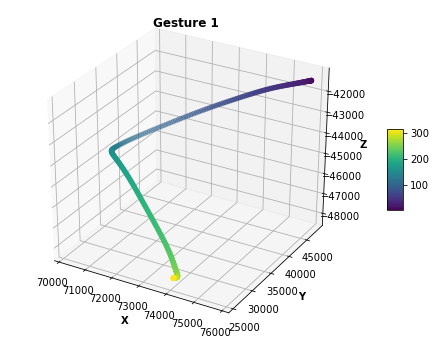

In [6]:
gesture_visualize(1)

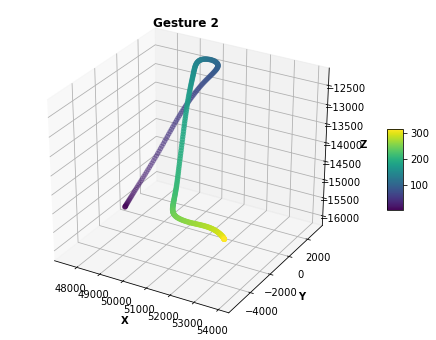

In [7]:
gesture_visualize(2)

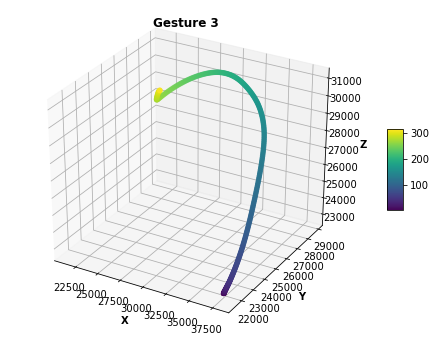

In [8]:
gesture_visualize(3)

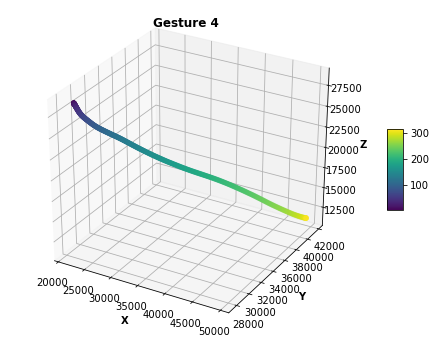

In [9]:
gesture_visualize(4)

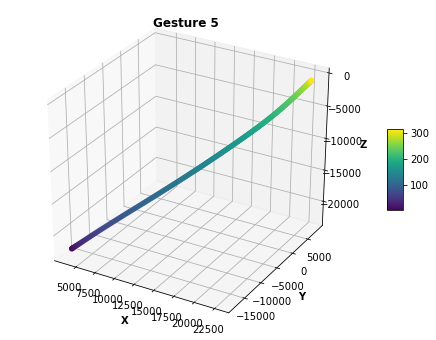

In [10]:
gesture_visualize(5)

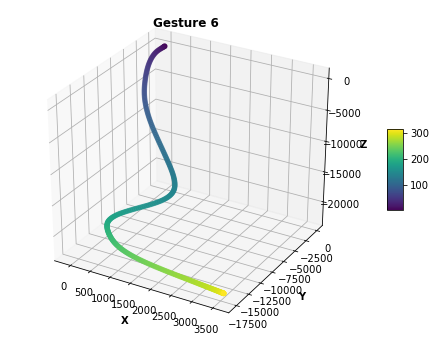

In [11]:
gesture_visualize(6)

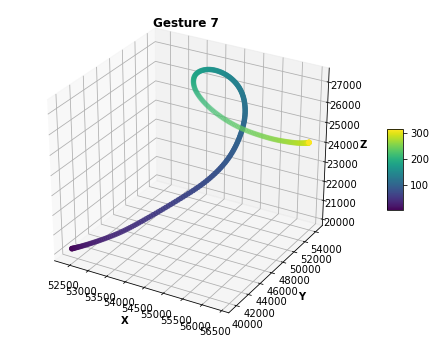

In [12]:
gesture_visualize(7)

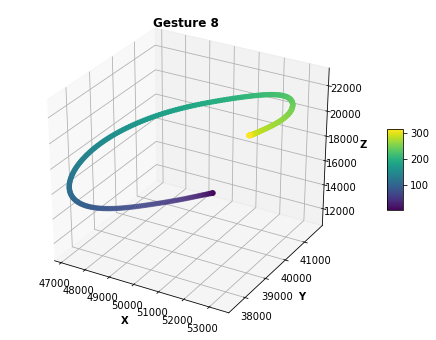

In [13]:
gesture_visualize(8)

### Comments: 

- Visualization of gesture 1 is similar to original movement in gesture 1. There is a corner point in the plot and it is where the direction of the movement changes.
- For gesture 2, the corners of the movement can be seen in the visualization.
- Visualizations of gesture 3,4,5 and 6 are not very similar to original shapes. These gestures don't contain corners in the movement and this can be observed in the plots but it is hard to imagine these gestures from their visualizations.
- We can see circular movements in the visualizations of gesture 7 and 8 as like in the original shapes but they don't look similar in plots although they are the same movement other than direction.

## Task b:
Apply PCA and visualize the reduced dimensions as time series

In [14]:
from sklearn.decomposition import PCA

In [15]:
data.drop(data.columns[8:11],axis=1,inplace=True)
pca = PCA()
principalComponents = pca.fit_transform(data[["x","y","z"]])
principalDf = pd.DataFrame(data = principalComponents,columns = ["x","y","z"])
principalDf.head()

,x,y,z
0,-2.493485,0.691694,-0.481512
1,-2.493485,0.691694,-0.481512
2,-2.493485,0.691694,-0.481512
3,-2.493485,0.691694,-0.481512
4,-2.493485,0.691694,-0.481512


In [16]:
principalDf.columns = ["pca_x","pca_y","pca_z"]
data_score = pd.concat([data,principalDf],axis=1)
data_score.head()

,time_seriesID,time_index,x,y,z,v_x,v_y,v_z,class,pca_x,pca_y,pca_z
0,1,1,-0.304,-2.12,-1.53,-0.304,-2.12,-1.53,6,-2.493485,0.691694,-0.481512
1,1,2,-0.304,-2.12,-1.53,-0.608,-4.24,-3.06,6,-2.493485,0.691694,-0.481512
2,1,3,-0.304,-2.12,-1.53,-0.912,-6.36,-4.59,6,-2.493485,0.691694,-0.481512
3,1,4,-0.304,-2.12,-1.53,-1.216,-8.48,-6.12,6,-2.493485,0.691694,-0.481512
4,1,5,-0.304,-2.12,-1.53,-1.520,-10.60,-7.65,6,-2.493485,0.691694,-0.481512


In [17]:
print("Explained variation per principal component:")
print("x: {}".format(pca.explained_variance_ratio_[0])+"\n" +"y: {}".format(pca.explained_variance_ratio_[1])
      +"\n" +"z: {}".format(pca.explained_variance_ratio_[2]))

Explained variation per principal component:
x: 0.49059806036848347
y: 0.3466916781080008
z: 0.16271026152351578


- It can be seen that explained variation by first principal component, which is x-axis, is higher than others and it is almost 50%.

**Visualizing two instances from each class**

In [18]:
# function for visualizing two instances of reduced dimensions
def visualize_reduced_dimension(axis,cl,color_ar):
    t = data_score[data_score["class"] == cl].iloc[0]["time_seriesID"]
    data1 = data_score[(data_score["class"] == cl) & (data_score["time_seriesID"] == t)]
    t = data_score[data_score["class"] == cl].iloc[315]["time_seriesID"]
    data2 = data_score[(data_score["class"] == cl) & (data_score["time_seriesID"] == t)]
    plt.plot(data1["time_index"],data1["pca_"+str(axis)],color=color_ar[0])
    plt.xlabel("Time Index")
    plt.ylabel("pca_"+str(axis))
    plt.xticks([])
    plt.title("Gesture"+str(cl))
    plt.plot(data2["time_index"],data2["pca_"+str(axis)],color=color_ar[1])
    plt.show()

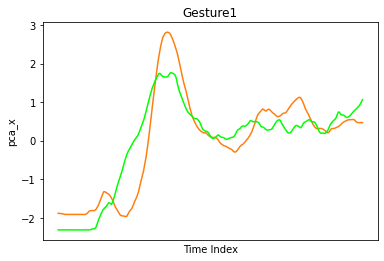

In [19]:
visualize_reduced_dimension("x",1,["tab:orange","lime"])

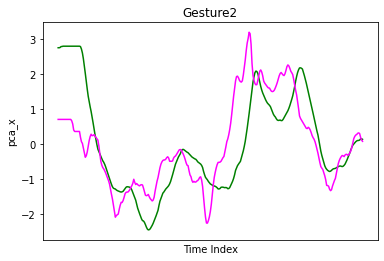

In [20]:
visualize_reduced_dimension("x",2,["g","fuchsia"])

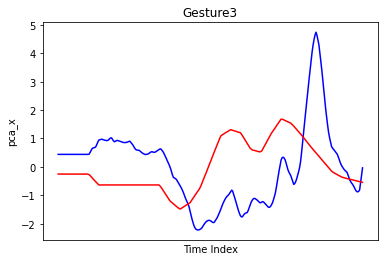

In [21]:
visualize_reduced_dimension("x",3,["b","r"])

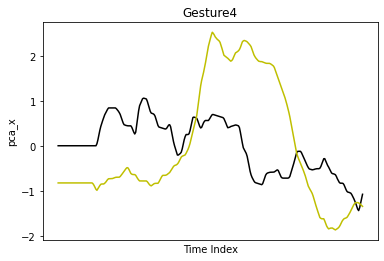

In [22]:
visualize_reduced_dimension("x",4,["black","y"])

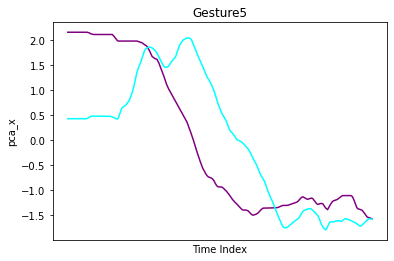

In [23]:
visualize_reduced_dimension("x",5,["purple","aqua"])

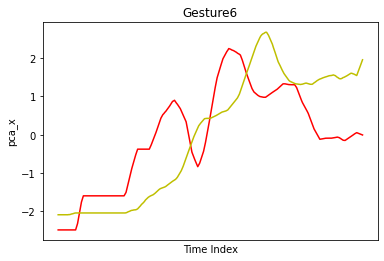

In [24]:
visualize_reduced_dimension("x",6,["r","y"])

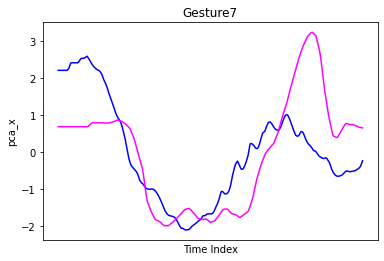

In [25]:
visualize_reduced_dimension("x",7,["b","fuchsia"])

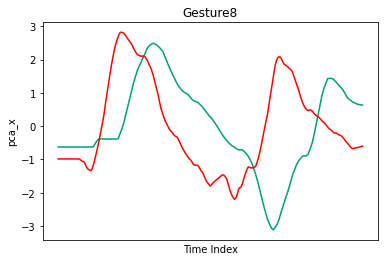

In [26]:
visualize_reduced_dimension("x",8,["#009E73","r"])

### Comments:
- There are similar patterns, e.g. up and down peak points, in time series of instances from the same class; this is valid especially for gesture 1,2,6,7 and 8.
- Time series for different classes seems definable but reduced one dimensional data is used for visualization and it explains only almost 50% of the total variance, so there are also differences in within class instances.

## Task c:
Apply PCA to each gesture class seperately

In [27]:
# text formatting
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [28]:
# function for applying and visualizing pca 
def apply_pca(cl,color_ar):
    # classify data for the given class
    class_data = data[data["class"]==cl].copy()
    #apply PCA with all components
    pca = PCA()
    principalComponents = pca.fit_transform(class_data[["x","y","z"]])
    principalDf = pd.DataFrame(data = principalComponents,columns = ["pca_x","pca_y","pca_z"])
    data_score = summarize_pca(cl,pca,principalDf)
    visualize_pca(cl,color_ar,data_score) 
    
def summarize_pca(cl,pca,principalDf):
    printmd("**Gesture {}**".format(str(cl)))
    print("Explained variation:")
    print(pca.explained_variance_ratio_)
    data_score = pd.concat([data,principalDf],axis=1)
    return data_score

def visualize_pca(cl,color_ar,data_score):
    t = data_score.iloc[0]["time_seriesID"]
    data1 = data_score[(data_score["time_seriesID"] == t)]
    t = data_score.iloc[315]["time_seriesID"]
    data2 = data_score[(data_score["time_seriesID"] == t)]
    fig=plt.plot()
    plt.plot(data1["time_index"],data1["pca_x"],color=color_ar[0])
    plt.xlabel("Time Index")
    plt.ylabel("pca_x")
    plt.xticks([])
    plt.title("Gesture"+str(cl))
    plt.plot(data2["time_index"],data2["pca_x"],color=color_ar[1])
    plt.show()

**Applying PCA to each class**

**Gesture 1**

Explained variation:
[0.46255432 0.32311782 0.21432786]


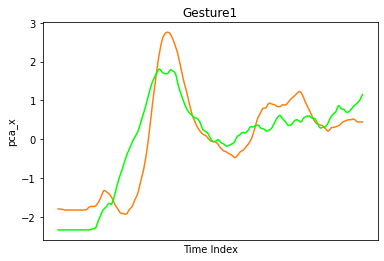

In [29]:
apply_pca(1,["tab:orange","lime"])

**Gesture 2**

Explained variation:
[0.51255306 0.31251192 0.17493502]


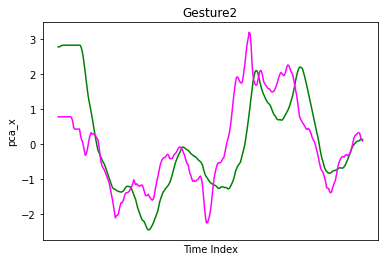

In [30]:
apply_pca(2,["g","fuchsia"])

**Gesture 3**

Explained variation:
[0.54076717 0.29926161 0.15997122]


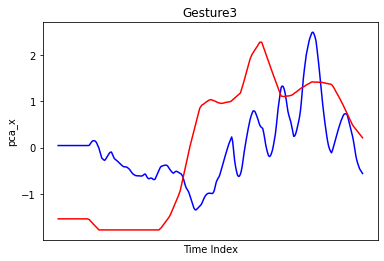

In [31]:
apply_pca(3,["b","r"])

**Gesture 4**

Explained variation:
[0.55011515 0.30758004 0.14230481]


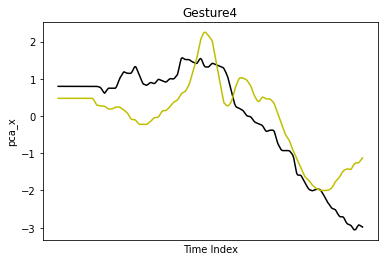

In [32]:
apply_pca(4,["black","y"])

**Gesture 5**

Explained variation:
[0.64723059 0.27460429 0.07816511]


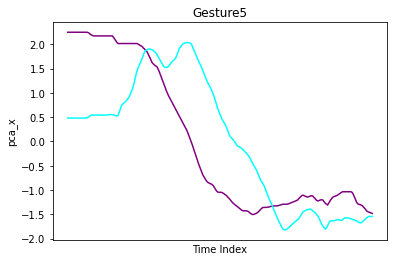

In [33]:
apply_pca(5,["purple","aqua"])

**Gesture 6**

Explained variation:
[0.57181174 0.32945062 0.09873763]


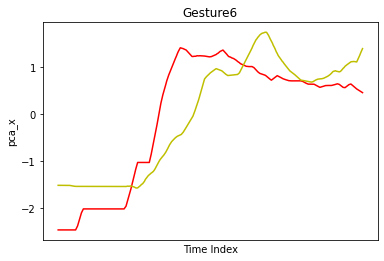

In [34]:
apply_pca(6,["r","y"])

**Gesture 7**

Explained variation:
[0.51921058 0.34301983 0.13776959]


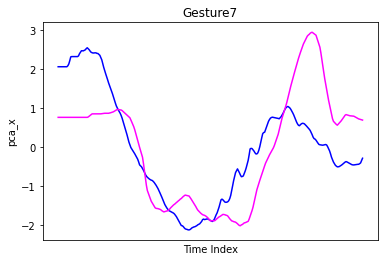

In [35]:
apply_pca(7,["b","fuchsia"])

**Gesture 8**

Explained variation:
[0.61343361 0.31204948 0.07451691]


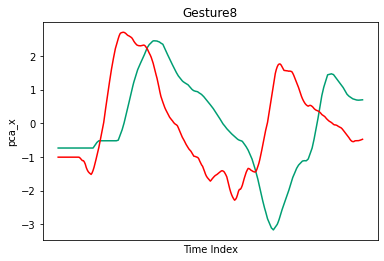

In [36]:
apply_pca(8,["#009E73","r"])

### <ins>Results<ins>

When PCA is applied to **all data**, explained variation per principal component:

| x | y | z |
| --- | --- | --- |
| 0.491 | 0.347 | 0.163 |
    

When PCA is applied to **each gesture class seperately**, explained variation per principal component:

| Class | x | y | z |
| :-: | --- | --- | --- |
| 1 | 0.463 | 0.323 | 0.214 |
| 2 | 0.513 | 0.313 | 0.175 |
| 3 | 0.541 | 0.299 | 0.160 |
| 4 | 0.550 | 0.308 | 0.142 |
| 5 | 0.647 | 0.275 | 0.078 |
| 6 | 0.572 | 0.329 | 0.099 |
| 7 | 0.519 | 0.343 | 0.138 |
| 8 | 0.613 | 0.312 | 0.075 |

- Using the above tables, we can say that, **except for *gesture 1*,** applying PCA to each class seperately gives better results, i.e. explained variation in the first principal component increases. 
- As like the previous task, time series are very similar in gestures 1,2,6,7 and 8.
- For gesture 4, similarities between instances much better compared to previous task result.

## Task d:
Apply multidimensional scaling to distance matrix to represent each time series on a 2-dimensional feature space.

In [37]:
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

In [38]:
# Calculation of euclidean distance matrix
x = euclidean_distances(dataX[dataX.columns[1:316]])
y = euclidean_distances(dataY[dataY.columns[1:316]])
z = euclidean_distances(dataZ[dataZ.columns[1:316]])
dist = pd.DataFrame(x+y+z)
dist

,0,1,2,3,4,5,6,7,8,9,...,886,887,888,889,890,891,892,893,894,895
0,0.000000,87.669477,79.473169,86.385742,70.036368,82.711625,84.564765,57.835242,65.070914,48.343061,...,79.635424,68.615259,71.027564,62.164474,90.563663,58.438974,68.985825,73.788542,81.044018,90.174445
1,87.669477,0.000000,44.971782,63.119374,54.762471,63.150382,65.137387,86.152973,60.961439,99.726722,...,79.084295,84.355071,55.637644,83.338479,47.340717,76.907145,94.624350,70.721021,73.147182,37.509745
2,79.473169,44.971782,0.000000,74.071237,51.547165,60.067566,91.544181,76.052482,60.349496,93.185775,...,86.072369,72.682044,54.988922,82.518507,55.753564,61.401519,86.190168,82.119416,91.202532,38.763436
3,86.385742,63.119374,74.071237,0.000000,76.335076,66.354710,67.556614,96.090404,85.512424,75.303633,...,70.554965,63.762273,79.883714,76.065505,57.675575,75.033702,77.315204,63.165970,63.871913,64.885148
4,70.036368,54.762471,51.547165,76.335076,0.000000,63.166747,77.191732,58.156432,32.421223,82.354990,...,81.713401,93.212444,26.891986,61.503108,83.134295,74.682143,76.700877,77.844667,75.682850,67.159349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,58.438974,76.907145,61.401519,75.033702,74.682143,78.673812,78.276245,71.560283,78.533656,66.195431,...,78.447280,58.977869,74.676170,80.990430,63.675048,0.000000,77.998944,77.151740,75.972989,74.778451
892,68.985825,94.624350,86.190168,77.315204,76.700877,65.594499,79.227536,61.184719,70.594869,62.081126,...,76.146048,64.848475,76.894936,59.659192,86.564636,77.998944,0.000000,72.214889,65.802455,84.916043
893,73.788542,70.721021,82.119416,63.165970,77.844667,74.221251,61.693219,85.695126,80.756524,77.260068,...,80.331008,72.667108,78.549527,67.367157,76.590297,77.151740,72.214889,0.000000,61.261579,77.230575
894,81.044018,73.147182,91.202532,63.871913,75.682850,81.698921,33.160606,74.405042,75.781921,74.101345,...,59.205862,71.940023,71.649351,66.621090,77.199867,75.972989,65.802455,61.261579,0.000000,83.521511


In [39]:
# applying MDS 
mds = MDS(2, dissimilarity='precomputed')
coords = mds.fit_transform(dist)
mds_data = pd.DataFrame(coords,columns=["x","y"])
mds_data["class"] = df["class"]
mds_data

,x,y,class
0,50.116992,28.284901,6
1,-12.636782,-54.861438,5
2,22.664441,-53.550843,5
3,-52.404549,-21.238185,3
4,28.965876,-28.239841,4
...,...,...,...
891,38.236268,-3.272922,3
892,16.344844,29.812848,1
893,-58.370966,-4.369837,2
894,-41.189445,13.054842,7


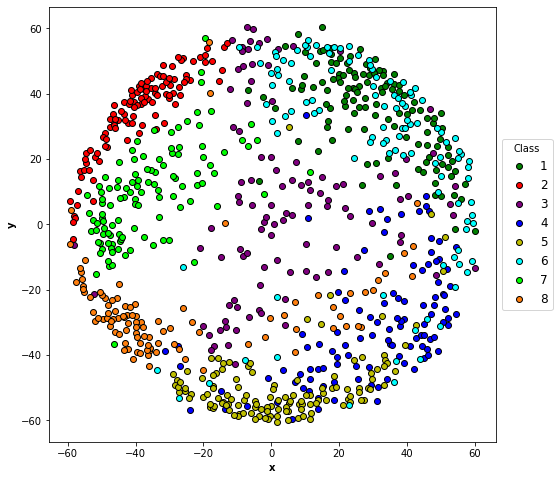

In [40]:
colors = ["g","r","purple","b","y","aqua","lime","tab:orange"]
fig = plt.figure(figsize=(8, 8))
for c in range(1,9):
    plt.scatter(mds_data[mds_data["class"] == c]["x"], mds_data[mds_data["class"] == c]["y"], marker='o',c=colors[c-1],
                edgecolors="black",label=str(c))
plt.xlabel("x",fontweight ='bold')
plt.ylabel("y",fontweight ='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12,title="Class")

plt.show()

### Comments:
- Gestures 1 and 6 and 4 and 5 are not successfully seperated from each other.
- Gestures 2 and 7 are seperated from other classes more successfully.
- Gestures 3 and 4 look like spreaded over some places, they are not clustered successfully.
- Most instances of gesture 8 are clustered in the down-left corner and seperated from other classes but it has also some instances mixed with other classes.
- Although there are some overlaps between different gesture classes, considering seperately this clustering can be used for classification.